## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28 * 28

784

Saving figure Some_Digit_Plot


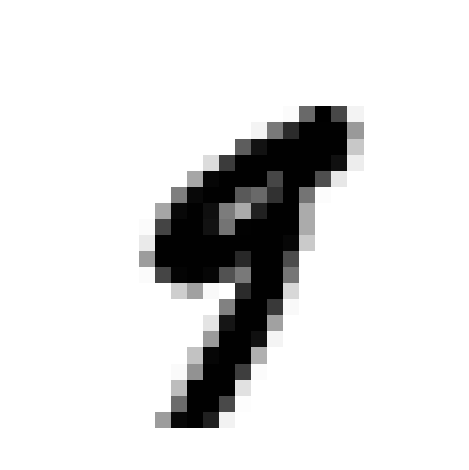

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
save_fig("Some_Digit_Plot")
plt.show()
# There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [8]:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [11]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


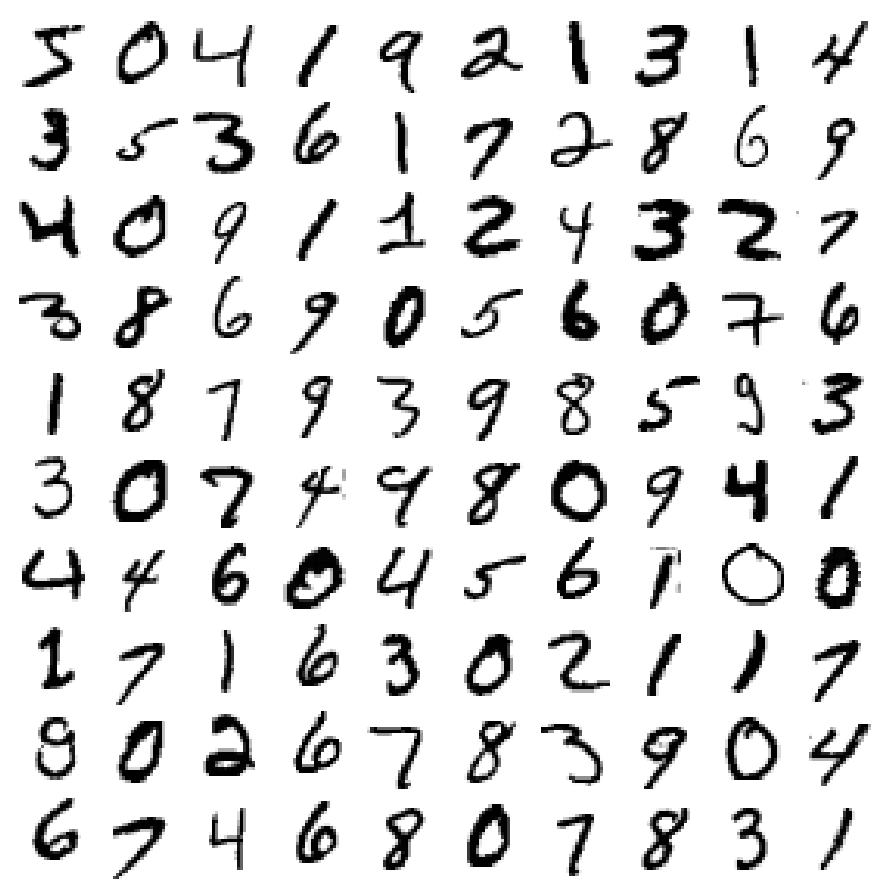

In [12]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [13]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [14]:
import numpy as np

shuffle_index = np.random.permutation(60000)   # Shuffling the dataset
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

In [15]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [16]:
# a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class
# This classifier has the advantage of being capable of handling very large datasets efficiently

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([False])

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9681 , 0.95655, 0.95515])

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96285
0.96195
0.9563


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.8678 , 0.88195, 0.86965])

In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):  # This line defines a new class called Never5Classifier
    def fit(self, X, y = None): # This is the fit method, which is a mandatory method in a scikit-learn estimator. However, in this implementation, the method does not actually do anything.
        pass
    def predict(self, X): # This is the predict method, which is also a mandatory method in a scikit-learn estimator. It takes an input data matrix X and returns predictions for each sample in X.
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")
# To summarize, the Never5Classifier is a trivial classifier that doesn't learn from the data during the training process (the fit method does nothing). Instead, it always predicts that the input samples are not the class "5" (the predict method returns an array of False values). While this classifier is not useful for real-world scenarios, it can be helpful in certain testing scenarios or as a baseline comparison against more sophisticated models.
# This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

array([0.909  , 0.90745, 0.9125 ])

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predic‐ tions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

array([[53124,  1455],
       [  949,  4472]], dtype=int64)

In [25]:
# Each row in a confusion matrix represents an actual class, while each column repre‐
# sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
# tive class): 53,272 of them were correctly classified as non-5s (they are called true
# negatives), while the remaining 1,307 were wrongly classified as 5s (false positives).
# The second row considers the images of 5s (the positive class): 1,077 were wrongly
# classified as non-5s (false negatives), while the remaining 4,344 were correctly classi‐
# fied as 5s (true positives). A perfect classifier would have only true positives and true
# negatives, so its confusion matrix would have nonzero values only on its main diago‐
# nal (top left to bottom right):

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,  y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.754513244474439

In [27]:
4472/(4472 + 1455)

0.754513244474439

In [28]:
recall_score(y_train_5, y_train_pred)

0.8249400479616307

In [29]:
4472/(4472 + 949)

0.8249400479616307

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) # The F1 score favors classifiers that have similar precision and recall.

0.7881565033486078

In [31]:
4472/(4472 + (1455 + 949) / 2) # F1 score

0.7881565033486077

In [32]:
#Recall / Precision Tradeoff
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-8239.10305608])

In [33]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [34]:
y_some_digit_pred

array([False])

In [35]:
threshold = 200000 # This confirms that raising the threshold decreases recall. The image actually repre‐sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 200,000.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [36]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

In [37]:
y_scores.shape

(60000,)

In [38]:
y_scores

array([-18922.19789678,  -9437.14784295,  -2464.76484921, ...,
        -7512.63380148, -16501.63029593, -16429.11305816])

In [39]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

Saving figure precision_recall_vs_threshold_plot


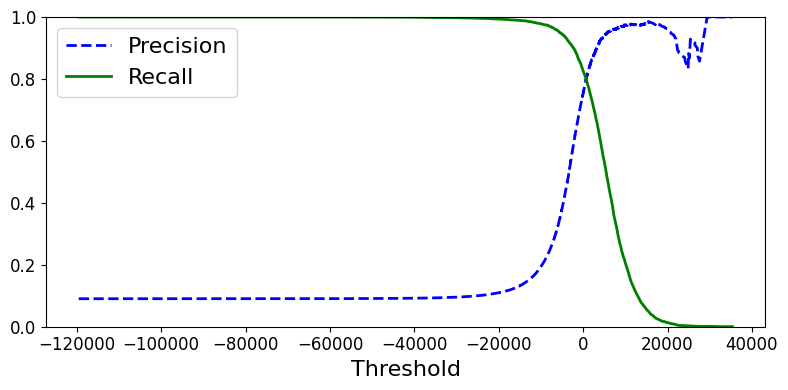

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [41]:
(y_train_pred == (y_scores > 0)).all()

True

In [42]:
y_train_pred_90 = (y_scores > 30000)
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [43]:
precision_score(y_train_5, y_train_pred_90)

1.0

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.0009223390518354548

Saving figure Precisions_vs_recall_plot


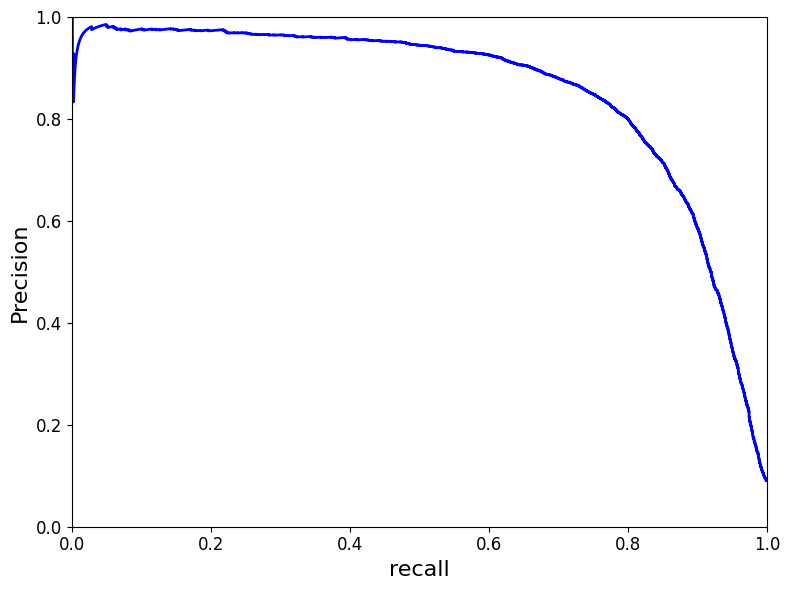

In [45]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig('Precisions_vs_recall_plot')
plt.show()

# ROC Curves

In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


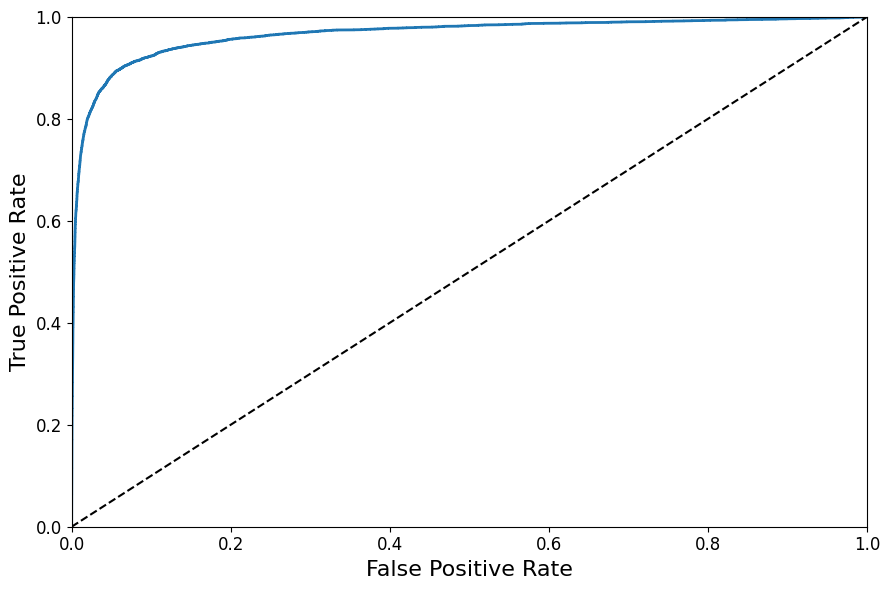

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dotted line in black color
    plt.axis([0, 1, 0, 1]) # This code sets the axis limits for the x-axis and y-axis of the plot. The arguments provided are [x_min, x_max, y_min, y_max]. In this case, the x-axis will range from 0 to 1, and the y-axis will also range from 0 to 1.
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(9, 6))
plot_roc_curve(fpr, tpr)
save_fig('roc_curve_plot')
plt.show()


In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9660259463088996

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [50]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure roc_curve_comparison_plot


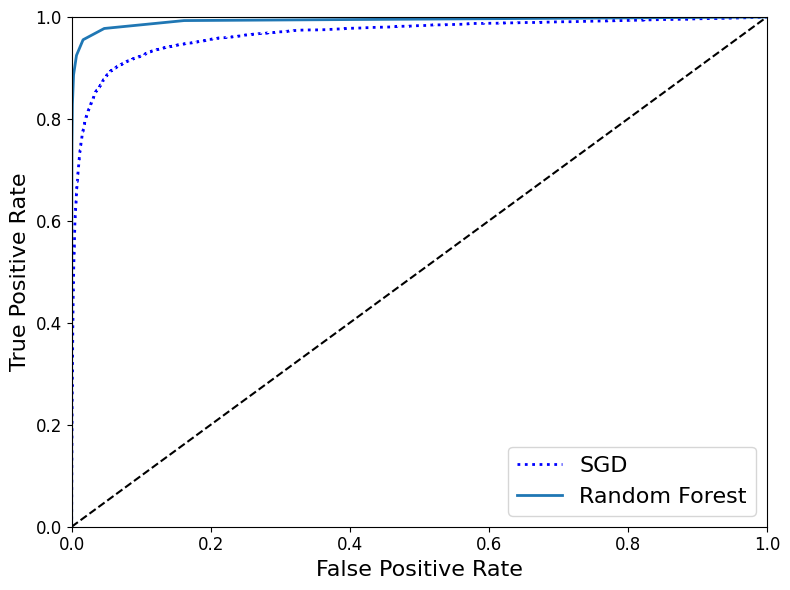

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9870386643233744

In [54]:
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

# Multiclass Classification

In [55]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [56]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-47579.686651  , -26323.25842842, -16923.9555781 ,
         -2222.40356584,  -8304.30825986,  -3686.0216797 ,
        -19145.32988739, -11326.19710087, -10402.0386515 ,
         -2528.6175673 ]])

In [57]:
np.argmax(some_digit_scores)

3

In [58]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [59]:
sgd_clf.classes_[5]

5

In [60]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

array([9], dtype=uint8)

In [61]:
len(ovo_clf.estimators_) # Number of binary classifiers have been trained
# If you have 'n' classes, the number of binary classifiers trained by OneVsOneClassifier would be n * (n - 1) / 2, because it trains a classifier for each possible pair of classes.

45

In [62]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

In [63]:
forest_clf.predict_proba([some_digit]) # probability estimates for each class for a given inpu

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

In [64]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.8678 , 0.88195, 0.86965])

In [65]:
# Scaling
from sklearn.preprocessing import StandardScaler # is used for standardizing (scaling) features by removing the mean and scaling to unit variance.
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train.astype(np.float64)) # The fit_transform method first computes the mean and standard deviation of each feature in the training data and then scales the features based on these computed statistics. The .astype(np.float64) ensures that the data is in the float64 format, which is the format that the scaler expects.
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90425, 0.9031 , 0.8903 ])

In [66]:
# Error Analysis
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred) #  A confusion matrix is a table that is often used to describe the performance of a classification model. It shows the counts of True Positive, False Positive, True Negative, and False Negative predictions made by the model.
conf_mx 
# y_train: The true target labels for the training data.
#y_train_pred: The predicted target labels for the training data obtained from the cross-validation predictions.

array([[5577,    0,   19,    5,   10,   39,   33,    5,  234,    1],
       [   1, 6413,   44,   17,    4,   45,    4,    8,  198,    8],
       [  23,   32, 5249,   88,   71,   20,   62,   39,  366,    8],
       [  27,   20,  115, 5216,    0,  197,   24,   44,  425,   63],
       [   7,   14,   46,   11, 5216,    8,   35,   20,  331,  154],
       [  28,   19,   31,  141,   52, 4466,   78,   18,  523,   65],
       [  27,   16,   50,    2,   39,   87, 5564,    7,  126,    0],
       [  20,   11,   52,   23,   50,   10,    4, 5702,  190,  203],
       [  18,   60,   42,  101,    2,  120,   32,   12, 5425,   39],
       [  22,   21,   29,   62,  123,   35,    1,  170,  361, 5125]],
      dtype=int64)

In [67]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111) #  The 111 argument specifies that the subplot grid should have 1 row, 1 column, and this particular subplot is the first one.
    cax = ax.matshow(matrix) # This line uses the matshow function to display the matrix (the confusion matrix) as a colored grid in the subplot. Each cell of the matrix will be represented by a color that corresponds to its value.
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


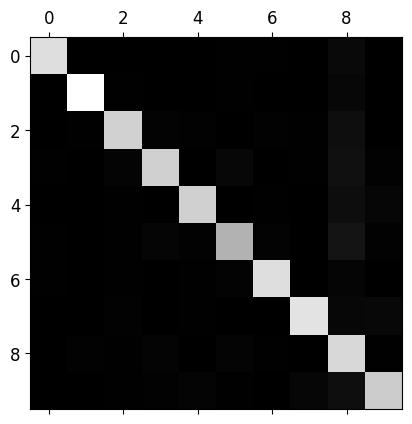

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False) 
plt.show()

In [69]:
rows_sum = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx / rows_sum

Saving figure confusion_matrix_error_plot


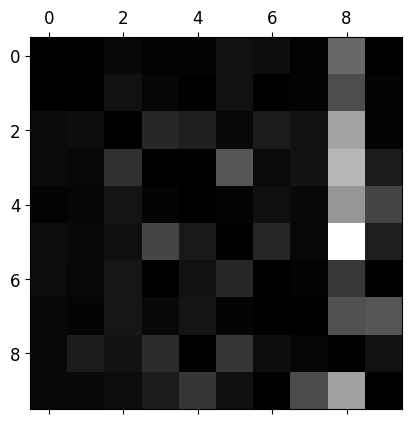

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_error_plot", tight_layout=False)
plt.show()

In [71]:
# Now you can clearly see the kinds of errors the classifier makes. Remember that rows
# represent actual classes, while columns represent predicted classes. The columns for
# classes 8 and 9 are quite bright, which tells you that many images get misclassified as
# 8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s
# and 9s are often confused with other digits. Conversely, some rows are pretty dark,
# such as row 1: this means that most 1s are classified correctly (a few are confused
# with 8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for
# example, there are more 5s misclassified as 8s than the reverse.

Saving figure error_analysis_digit_plot


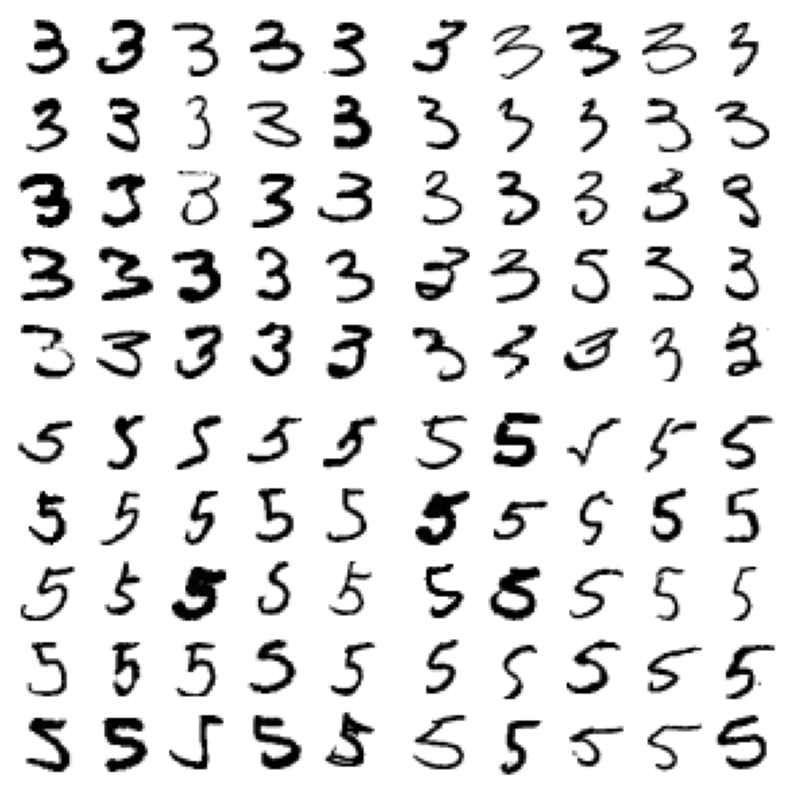

In [73]:
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
save_fig("error_analysis_digit_plot")
plt.show()

# Multilabel Classification


In [74]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # two target label for each digit image  the first indicates whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd.

knn_clf = KNeighborsClassifier() # Support multilabel classification
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [75]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [76]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3) 
f1_score(y_train, y_train_knn_pred, average="macro")  # The F1 score takes into account both precision and recall of the model's predictions.
# average="macro": This parameter specifies how to compute the F1 score. "Macro" averaging calculates the F1 score for each label independently and then takes the unweighted mean of these scores. This is suitable for multilabel problems where each label is treated equally important.

0.9681383028054587

# Multioutput Classification

In [77]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

Saving figure noisy_digit_example_plot


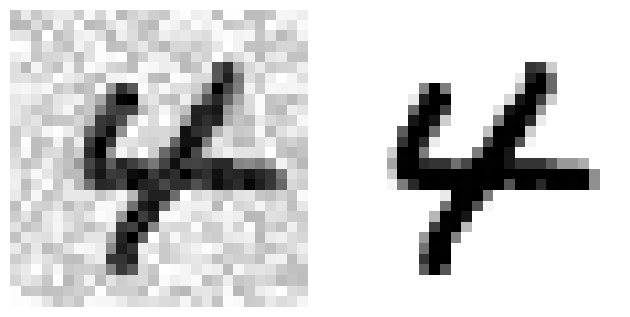

In [78]:
some_index = 5500
plt.subplot(121); plot_digit(x_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


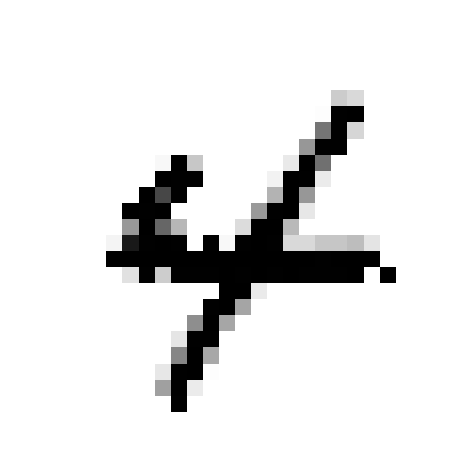

In [79]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")